In [1]:
import tensorflow as tf

In [2]:
import keras

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
tf.__version__

'2.8.0'

In [4]:
mnist = tf.keras.datasets.mnist

In [5]:
(x_train,y_train), (x_test, y_test) = mnist.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [88]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape =(28,28)),
    tf.keras.layers.Dense(128, activation= "relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation= "softmax")
])


model.compile(optimizer = "adam", 
             loss = "sparse_categorical_crossentropy",
             metrics = ["accuracy"])

In [89]:
predictions = model(x_train[:1]).numpy()
predictions

array([[0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.437233e-24, 6.070124e-15, 1.000000e+00,
        0.000000e+00, 0.000000e+00]], dtype=float32)

In [90]:
tf.nn.softmax(predictions).numpy()

array([[0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674,
        0.08533674, 0.08533674, 0.23196931, 0.08533674, 0.08533674]],
      dtype=float32)

In [91]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

In [92]:
loss_fn(y_train[:1], predictions).numpy()

2.4611502

In [94]:
model.compile(optimizer = "adam", 
             loss = loss_fn,
             metrics = ["accuracy"])

In [96]:
model.fit(x_train,y_train, epochs = 5)

Epoch 1/5


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 4s 2ms/step - loss: 2.4373 - accuracy: 0.7534
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5759 - accuracy: 0.8397
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4740 - accuracy: 0.8696
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4272 - accuracy: 0.8844
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4061 - accuracy: 0.8917


In [97]:
model.fit(x_train,y_train,epochs = 5)
model.evaluate(x_test,y_test,verbose = 2)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3737 - accuracy: 0.9031
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3708 - accuracy: 0.9036
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3622 - accuracy: 0.9055
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3518 - accuracy: 0.9082
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3418 - accuracy: 0.9131
313/313 - 0s - loss: 0.2706 - accuracy: 0.9421 - 490ms/epoch - 2ms/step


[0.270588755607605, 0.9420999884605408]

In [98]:
probablity_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [99]:
probablity_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674,
        0.08533674, 0.08533674, 0.23196931, 0.08533674, 0.08533674],
       [0.08533702, 0.08533703, 0.23196508, 0.08533883, 0.08533702,
        0.08533702, 0.08533702, 0.08533702, 0.08533702, 0.08533702],
       [0.08533674, 0.23196931, 0.08533674, 0.08533674, 0.08533674,
        0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674],
       [0.23196578, 0.08533697, 0.0853373 , 0.08533697, 0.08533763,
        0.08533697, 0.08533698, 0.08533747, 0.08533697, 0.08533697],
       [0.08538744, 0.08538746, 0.08539324, 0.08538759, 0.23116577,
        0.08539053, 0.085391  , 0.08553286, 0.08538744, 0.08557675]],
      dtype=float32)>

In [100]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [101]:
from matplotlib import pyplot as plt

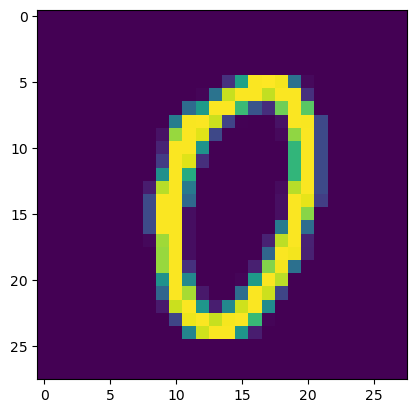

0


In [11]:
plt.imshow(x_train[1000])
plt.show()
print(y_train[1000])